<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/SpaceVector_ClarkeAndInverseTransformationsFourPhase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Space Vector: Clarke Transformation and Inverse for Four-Phase System</h1></b>

Dr. Bingsen Wang

7/27/2024
</center>

#Four-Phase Variables

In three-phase power systems, the voltages are typically sinusoidal. The three phase voltages $v_1,v_2,v_3,v_4$ form a postive sequence.
$$
v_k = V\cos\left[\omega_e t+\theta -(k-1)\frac{\pi}{2} \right]
\tag{1}$$

#Space Vector

The space vector is complex variable defined as
$$\underline f = {2\over4}\left(f_a + f_be^{j\frac{\pi}{2}} + f_ce^{j\pi}+ f_de^{j\frac{3\pi}{2}}\right)\tag{2}$$
where $f_a,f_b,f_c,f_d$ are the four-phase variables. In electrical systems, the variable $f$ can be voltage $v$, current $i$, or flux linkage $\lambda$. In power electronics systems, the variable $f$ can be the modulation function or switching function.

##Space Vector in Stationary Reference Frame

With reference to (1) and (2), the voltage space vector in stationary reference frame is
$$\begin{align}
\underline v_{\alpha\beta} &= {1\over2}\left(v_1 + v_2e^{j\frac{\pi}{2}} + v_3e^{j\pi}+v_4e^{j\frac{3\pi}{2}}\right)\\
&= {V\over2}\left[\cos\left(\omega_e t+\theta\right) +
\cos\left(\omega_e t+\theta - \frac{\pi}{2} \right)e^{j\frac{\pi}{2}} \\
+\cos\left(\omega_e t+\theta - \pi \right)e^{j\pi} + \cos\left(\omega_e t+\theta - \frac{3\pi}{2} \right)e^{j\frac{3\pi}{2}}\right]
\end{align}\tag{3}$$

Based on Euler's identity $e^{jx}=\cos x + j\sin x$, the cosine function can be written in terms exponential functions.
$$\cos x = \frac{e^{jx} + e^{-jx}}{2}\tag{4}$$

Hence, (3) can be rewritten as
$$\begin{align}\underline v_{\alpha\beta}&= Ve^{j(\omega_e t+\theta)}
\end{align}\tag{5}$$

#Python Code
The Python code illustrates the Clarke transformation and inverse for 5-phase system.

0
0
30
60
90
120
150
180
210
240
270
300
330
360
390
420
450
480
510
540
570
600
630
660
690
720
750
780
810
840
870
0


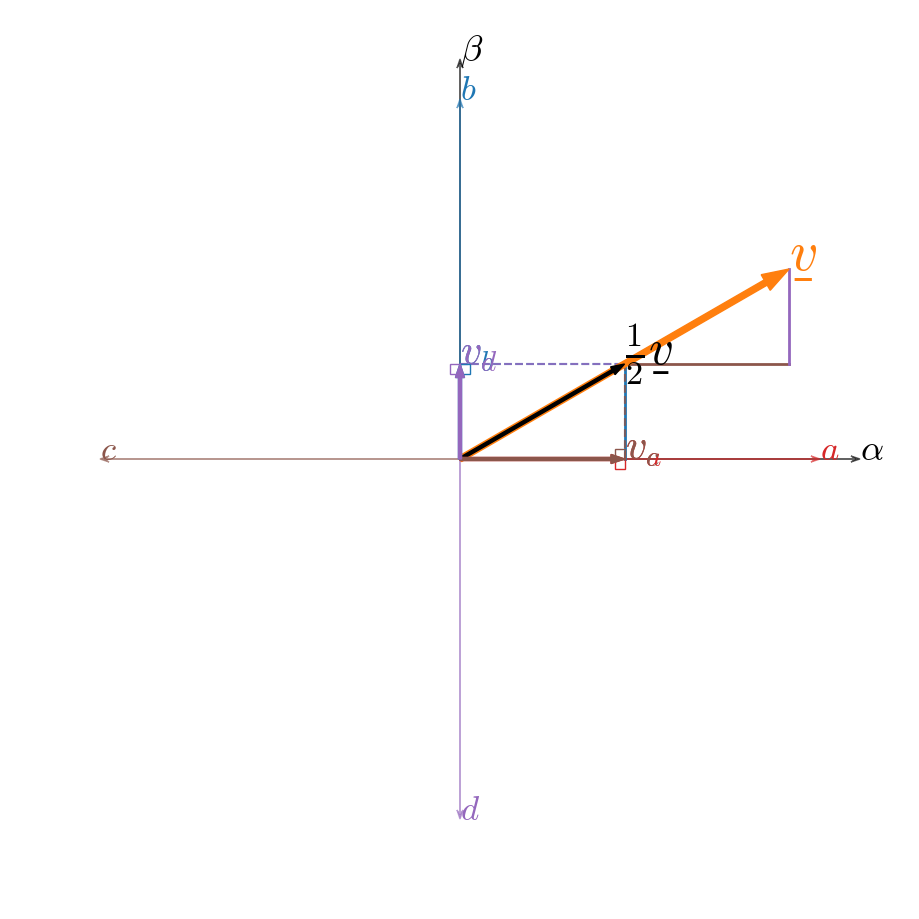

In [25]:
from os import linesep
import numpy as np
from numpy import linspace,cos,sin,pi,exp,angle,array
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.patches import FancyArrow as fa
from matplotlib import animation,rc,transforms
plt.rcParams.update({"font.family" : "sans serif","mathtext.fontset" : "cm"})

def v_abcde(V,w,t,theta): #voltages in abc
  return V*array([cos(w*t+theta-k*pi/2) for k in range(4)])
def abc2ab(abc): #Clarke transformation, abc to alpha-beta
  x=0
  for k in range(4): x+=1/2*abc[k]*exp(1j*pi*k/2)
  return x

#parameters
Nfps = 900
V,fe,theta = 3.8,1,pi/6 #voltage amplitude,frequency,phase
t=linspace(0,1/fe,Nfps)
wt = 2*pi*fe*t #angular frequency
vabc=v_abcde(V,2*pi*fe,t,theta) #voltages in abcde
vab=abc2ab(vabc) #spac vector in alpha-beta

#plotting
xymax,xylim = 4,[-4.5,4.5]
clst=['tab:red','tab:blue','tab:brown','tab:purple','tab:green',
      'tab:olive','tab:orange','k','w'] #colors light bg
tns = ['$a$','$b$','$c$','$d$',
       r'$v_a$',r'$v_b$',r'$v_c$',r'$v_d$',
       r'$\alpha$',r'$\beta$'] #labels
fig = plt.figure(figsize=(9,9))
axs,lines,txts = [],[],[]
as1 = {'head_width':.06,'length_includes_head':True,'overhang':.5} #arr style
as2 = {'width':.06,'length_includes_head':True} #arr style
as3 = {'width':.03,'length_includes_head':True} #arr style
for k in range(2):
  axs.append(fig.add_axes((0,0,1,1),xlim=xylim,ylim=xylim,fc='none'))
  rot=transforms.Affine2D().rotate_around(0,0,pi/2*k)+axs[0].transData
  axs[0].add_patch(fa(0,0,xymax,0,**as1,transform=rot,color=clst[-2],alpha=.6))#ab ax
  axs[0].text((1-k)*xymax,k*xymax,tns[k+8],size=26) #ax labels
axs[0].set_axis_off()
lines.append(axs[0].plot([],[],'-',lw=3,color=clst[-4])[0]) #v_alpha, v_beta
for k in range(4):
  rot=transforms.Affine2D().rotate_around(0,0,pi/2*k-pi/2)+axs[0].transData
  lines.append(axs[0].plot([],[],'-',lw=2,transform=rot,color=clst[k],alpha=0.5)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.5,transform=rot,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'--',lw=1.5,color=clst[k],alpha=0.8)[0])
  lines.append(axs[0].plot([],[],'-',lw=2,color=clst[k])[0])
  txts.append(axs[0].text(0,0,tns[4+k],size=30,transform=rot,color=clst[k]))
  rot=transforms.Affine2D().rotate_around(0,0,pi*k/2)+axs[0].transData
  axs[0].add_patch(fa(0,0,.9*xymax,0,**as1,transform=rot,color=clst[k],alpha=.6))#abcde ax
  axs[0].text(.9*xymax,0,tns[k],size=25,transform=rot,color=clst[k]) #ax labels

def drawVectors_srf(ax,xymax,vabc,vab,wt,clst): # in stationary reference frame
  ax.clear()
  ax.set_xlim(xylim)
  ax.set_ylim(xylim)
  ax.axis('off')
  ax.add_patch(fa(0,0,vab.real, vab.imag, **as2,color=clst[-3])) #sv_ab
  ax.text(vab.real,vab.imag,r'$v\underbar$',size = 40,color=clst[-3])
  ax.add_patch(fa(0,0,vab.real/2, vab.imag/2, **as3,color=clst[-2])) #scaled
  ax.text(vab.real/2,vab.imag/2,r'$\frac{1}{2}v\underbar$',size = 35,color=clst[-2])
  for k in range(4):
    rot=transforms.Affine2D().rotate_around(0,0,pi/2*k)+ax.transData
    ax.add_patch(fa(0,0,vabc[k]/2,0,**as3,transform=rot,color=clst[k]))
    ax.add_patch(mp.Rectangle((vabc[k]/2,0),0.1,0.1,angle=-90*np.heaviside(vabc[k],0)-90,
                              rotation_point='xy',transform=rot,color=clst[k],fc='none'))
  return

# animation function. This is called sequentially
def animate(i):
  # i=80
  if i%30==0: print(i) #for monitoring the progress
  lines[0].set_data(vab[:i+1].real,vab[:i+1].imag)
  for k in range(4):
    lines[4*k+1].set_data(.7*t[:i+1]/t[-1]*xymax,vabc[k,:i+1]/2) #va,b,c,d,e
    lines[4*k+2].set_data([0,.7*t[i]/t[-1]*xymax],[vabc[k,i]/2,vabc[k,i]/2])
    lines[4*k+3].set_data([vabc[k,i]*cos(k*pi/2)/2,vab[i].real/2],[vabc[k,i]*sin(k*pi/2)/2,vab[i].imag/2])
    if k>0:
      v2=0
      for kk in range(k+1):
        v2+=vabc[kk,i]/2*exp(1j*pi*kk/2)
      v1=v2 - vabc[k,i]/2*exp(1j*pi*k/2)
      lines[4*k+4].set_data([v1.real,v2.real],[v1.imag,v2.imag])
    txts[k].set_position((.7*t[i]/t[-1]*xymax,vabc[k,i]/2))
  drawVectors_srf(axs[1],xymax,vabc[:,i],vab[i],wt[i],clst)
  return
anim = animation.FuncAnimation(fig, animate, frames=Nfps, interval=50)
fn = r"SpaceVector_ClarkeAndInverseFourPhase.mp4"
writervideo = animation.FFMpegWriter(fps=30)
anim.save(fn, writer=writervideo,dpi = 200)